In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import inspect
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

import path_utils
path_utils.add_path_to_sys_path("../../src", mode="relative_to_cwd", frame=inspect.currentframe())
import interiornet
import transforms

dict_keys(['albedo', 'color', 'semantic'])
torch.Size([4, 480, 640]) torch.float32
torch.Size([4, 480, 640]) torch.float32
torch.Size([1, 480, 640]) torch.int32


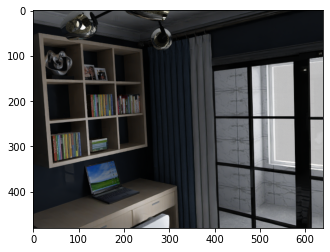

In [3]:
# You need to download at least a few images from the InteriorNet dataset, and the split CSV file (see dataset_util/interiornet).
# The data loader assumes that the split CSV file is in data_dir

data_dir = "/Users/mroberts/code/github/active_segmentation/dataset_util/interiornet/tmp"
split    = "train"

# # include all modalities in the InteriorNetDataset object
# modalities = "all"

# only load specified modalities in the InteriorNetDataset object
modalities = ["albedo", "color", "semantic"]

# can explicitly specify the number of items in the InteriorNetDataset object (useful for debugging)
num_items = 10

# transpose channels and convert to PyTorch tensor
transform = torchvision.transforms.Compose([
    # transforms.SingleModalityTransform("semantic", transforms.NYU40ToNYU13()),
    transforms.AllModalitiesTransform(torchvision.transforms.ToTensor())
])

# # include all items in the InteriorNetDataset object
# num_items = None

dataset = interiornet.InteriorNetDataset(
    data_dir=data_dir,
    split=split,
    modalities=modalities,
    transform=transform,
    num_items=num_items)

item = dataset[0]

print(item.keys())
print(item["albedo"].shape,   item["albedo"].dtype)
print(item["color"].shape,    item["color"].dtype)
print(item["semantic"].shape, item["semantic"].dtype)

plt.imshow(np.array(item["color"]).transpose([1,2,0]));

In [4]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=False)

In [5]:
batch = next(iter(dataloader))
print(batch.keys())
print(batch["albedo"].shape,   batch["albedo"].dtype)
print(batch["color"].shape,    batch["color"].dtype)
print(batch["semantic"].shape, batch["semantic"].dtype)

dict_keys(['albedo', 'color', 'semantic'])
torch.Size([2, 4, 480, 640]) torch.float32
torch.Size([2, 4, 480, 640]) torch.float32
torch.Size([2, 1, 480, 640]) torch.int32


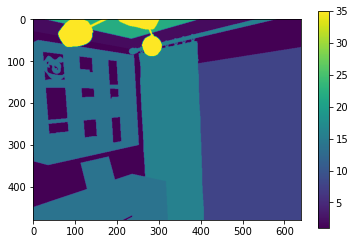

In [6]:
item_semantic = batch["semantic"][0]
plt.imshow(np.array(item_semantic).squeeze());
plt.colorbar();

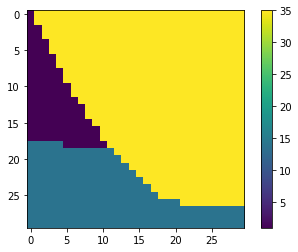

In [7]:
item_semantic = batch["semantic"][0]
plt.imshow(np.array(item_semantic).squeeze()[40:70,60:90]);
plt.colorbar();

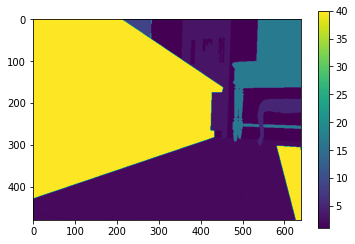

In [8]:
item_semantic = batch["semantic"][1]
plt.imshow(np.array(item_semantic).squeeze());
plt.colorbar();

torch.Size([2, 4, 480, 640])
(4, 480, 640)
0.0
1.0


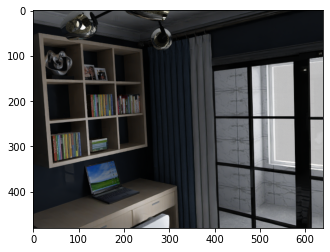

In [9]:
print(batch["color"].shape)

color = np.array(batch["color"][0])
print(color.shape)
print(np.min(color))
print(np.max(color))

plt.imshow(np.array(color).transpose([1,2,0]).astype(np.float32).squeeze());

torch.Size([2, 4, 480, 640])
(4, 480, 640)
0.0
1.0


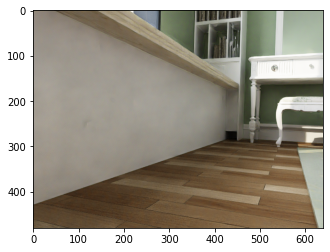

In [10]:
print(batch["color"].shape)

color = np.array(batch["color"][1])
print(color.shape)
print(np.min(color))
print(np.max(color))

plt.imshow(np.array(color).transpose([1,2,0]).astype(np.float32).squeeze());